# **Modelado para Series de Tiempo**

In [79]:
import pandas as pd

In [151]:
ipc = pd.read_csv('ipc.csv')

<Axes: >

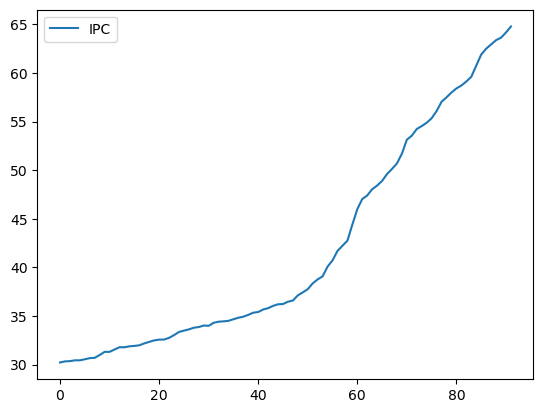

In [81]:
ipc.plot()

Se ve que no es estacionaria

## **Transformaci√≥n de Box-Cox**

##### **Explicacion**

La transformaci√≥n de Box-Cox es una familia de transformaciones de potencia que busca estabilizar la varianza y hacer que los datos sigan una distribuci√≥n m√°s normal. Se define matem√°ticamente como:  

$$
y^{*} =
\begin{cases} 
\frac{y^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \\
\ln(y), & \lambda = 0
\end{cases}
$$

Se Usa en Series de Tiempo porque 
1. Estabiliza la varianza en datos con heterocedasticidad.  
2. Mejora la normalidad, lo que facilita el modelado con ARIMA o regresi√≥n. 

Cuando decimos que los datos "siguen una distribuci√≥n m√°s normal" despu√©s de aplicar la transformaci√≥n de Box-Cox, nos referimos a que la forma de la distribuci√≥n de los datos se acerca m√°s a una distribuci√≥n normal $N(\mu, \sigma^2)$.

Cuando aplicamos la transformaci√≥n de Box-Cox a una serie de tiempo, buscamos que los datos transformados tengan una distribuci√≥n m√°s cercana a la normal en el sentido de que:  

1. Los residuos del modelo sean normales.  
2. Se reduzca la asimetr√≠a y se estabilice la varianza.
3.  Mejora la aplicabilidad de m√©todos estad√≠sticos. Pruebas como Dickey-Fuller para estacionariedad funcionan mejor con datos m√°s sim√©tricos.

**Problema Com√∫n:**  
Supongamos que tienes una serie de tiempo como el IPC que crece con el tiempo y tiene alta varianza en valores recientes. Esto significa que:  
- La serie no es estacionaria.  
- Los residuos de un modelo pueden ser sesgados y no normales.  

**Soluci√≥n con Box-Cox:**  
- Box-Cox ajusta la escala de los datos.  
- Reduce el efecto de valores extremos.  
- Hace que la serie sea m√°s "normal" para mejorar los modelos. 

**Interpretaci√≥n del Par√°metro $\lambda$**
El par√°metro $\lambda$ controla la forma de la transformaci√≥n:  

$\lambda = 1$: No hay cambio ($y^* = y$)  
$\lambda = 0$: Se usa el logaritmo natural ($y^* = \ln(y)$)  
$\lambda > 1$: Expande los valores grandes (convexa)  
$0 < \lambda < 1$: Suaviza la varianza  
$\lambda < 0$: Invierte el orden y reduce la dispersi√≥n


**¬øC√≥mo se Estima $\lambda$?**

El valor √≥ptimo de $\lambda$ se elige maximizando la verosimilitud. Espec√≠ficamente, se encuentra el $\lambda$ que maximiza la log-verosimilitud bajo la suposici√≥n de normalidad de los datos transformados:

$$
\log L(\lambda) = -\frac{n}{2} \log \left( \frac{1}{n} \sum (y^* - \bar{y^*})^2 \right) + (\lambda - 1) \sum \ln(y)
$$

donde $n$ es el n√∫mero de observaciones.



Paso 2: Funci√≥n de Verosimilitud
Bajo la suposici√≥n de normalidad de los datos transformados, la funci√≥n de verosimilitud de una muestra de $n$ observaciones es:

$$
L(\lambda, \mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i^* - \mu)^2}{2\sigma^2} \right)
$$

Tomando el logaritmo de la funci√≥n de verosimilitud:

$$
\log L(\lambda, \mu, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i^* - \mu)^2
$$

Para estimar $\lambda$, podemos eliminar los t√©rminos constantes y centrarnos en la parte que depende de $\lambda$.




Paso 3: Eliminaci√≥n de $\mu$
El estimador de m√°xima verosimilitud de $\mu$ en una normal es la media muestral:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} y_i^*
$$

Reemplazando esto en la ecuaci√≥n:

$$
\log L(\lambda) = -\frac{n}{2} \log \left( \frac{1}{n} \sum_{i=1}^{n} (y_i^* - \bar{y^*})^2 \right) + C
$$

donde $C$ es una constante que no depende de $\lambda$.

Pero, debido a la transformaci√≥n de Box-Cox, el Jacobiano de la transformaci√≥n debe incluirse en la log-verosimilitud. Para una transformaci√≥n de Box-Cox, el Jacobiano es:

$$
J = \prod_{i=1}^{n} y_i^{\lambda - 1}
$$

Tomando logaritmo:

$$
\log J = (\lambda - 1) \sum \ln y_i
$$

Por lo tanto, la log-verosimilitud final queda como:

$$
\log L(\lambda) = -\frac{n}{2} \log \left( \frac{1}{n} \sum (y^* - \bar{y^*})^2 \right) + (\lambda - 1) \sum \ln(y)
$$

##### **Box-Cox** 

In [82]:
from scipy.stats import boxcox

In [83]:
ipc_boxcox, lambdaa = boxcox(ipc['IPC'])

In [84]:
tipc = pd.DataFrame(ipc_boxcox, index=ipc.index)
tipc.columns = ['IPC']

## **Estacionariedad**

##### **Interpretacion del `adfuller()`**

El resultado que muestras proviene de la prueba de Dickey-Fuller aumentada (ADF), que es utilizada para comprobar si una serie de tiempo es estacionaria. Esta prueba eval√∫a la hip√≥tesis nula de que una serie de tiempo tiene una ra√≠z unitaria (lo que indicar√≠a que la serie no es estacionaria, es decir, que tiene una tendencia o una estructura estoc√°stica).

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [126]:
adfuller(ipc['IPC'])

(2.54902325412832,
 0.9990639726819293,
 1,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 20.0058424285088)

1. Estad√≠stico de la prueba (2.54902325412832):
   - Este es el valor de la estad√≠stica de la prueba ADF. Este valor se compara con los valores cr√≠ticos para determinar si rechazamos o no la hip√≥tesis nula.
   - Si el valor del estad√≠stico de prueba es menor (m√°s negativo) que los valores cr√≠ticos, podemos rechazar la hip√≥tesis nula y concluir que la serie es estacionaria.

2. p-value (0.9990639726819293):
   - El p-valor nos indica la probabilidad de obtener una estad√≠stica de prueba tan extrema como la observada bajo la hip√≥tesis nula.
   - En este caso, el p-valor es 0.9991, que es extremadamente alto, lo que sugiere que no hay evidencia suficiente para rechazar la hip√≥tesis nula de que la serie tiene una ra√≠z unitaria y, por lo tanto, no es estacionaria.

3. N√∫mero de lags usados (1):
   - Este es el n√∫mero de retardos (lags) que se utilizaron en el modelo para realizar la prueba. En este caso, el n√∫mero de lags es 1.

4. N√∫mero de observaciones (90):
   - El n√∫mero de observaciones de la serie de tiempo que se usaron para realizar la prueba.

5. Valores cr√≠ticos:
   - Los valores cr√≠ticos son los puntos de corte para diferentes niveles de significancia (1%, 5%, 10%).
   - Para un nivel de significancia del 1%, 5% y 10%, los valores cr√≠ticos son los siguientes:
     - 1%: -3.505190196159122
     - 5%: -2.894232085048011
     - 10%: -2.5842101234567902
   - Si el estad√≠stico de prueba es m√°s negativo que el valor cr√≠tico en cualquiera de estos niveles, rechazamos la hip√≥tesis nula. En este caso, el estad√≠stico de prueba (2.549) es mucho mayor que los valores cr√≠ticos (en valor absoluto), por lo que no rechazamos la hip√≥tesis nula.

6. Valor de la regresi√≥n (20.0058424285088):
   - Este es el valor de la regresi√≥n de la prueba ADF. No es tan com√∫nmente utilizado para la interpretaci√≥n directa, pero est√° relacionado con la regresi√≥n utilizada para calcular el estad√≠stico de prueba.

#### **Aumented Dickey-Fuller**

In [144]:
from statsmodels.tsa.stattools import adfuller

In [145]:
adfuller(ipc['IPC'])

(2.54902325412832,
 0.9990639726819293,
 1,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 20.0058424285088)

In [146]:
adfuller(tipc['IPC'])

(0.17083169485087543,
 0.9705773552398157,
 1,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 -1642.9082081223091)

No son estacionarios.

## **Diferencias $\nabla$**

#### info

El m√©todo `.diff()` en pandas calcula la **primera diferencia** de una serie de tiempo porque, por defecto, resta cada valor del anterior.  

$$
\nabla y_t = y_t - y_{t-1}
$$

#### $\nabla\text{IPC}$

In [165]:
ipc['diff'] = ipc['IPC'].diff()

In [166]:
adfuller(ipc['diff'].dropna())

(-4.133775317275253,
 0.0008512426861773767,
 0,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 22.18303504045545)

la primera diferencia es estacionaria

In [167]:
ipc['diff'].var()

0.12617814334554342

#### $\nabla^2\text{IPC}$

In [168]:
ipc['diff2'] = ipc['diff'].diff()

In [169]:
adfuller(ipc['diff2'].dropna())

(-6.510158362531559,
 1.1055448393340443e-08,
 5,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 26.3119362535989)

In [170]:
ipc['diff2'].var()

0.08220938377028734

#### $\nabla\text{T(IPC)}$

In [171]:
tipc['diff'] = tipc['IPC'].diff()

In [172]:
adfuller(tipc['diff'].dropna())

(-5.66482372182217,
 9.202930495193036e-07,
 0,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 -1626.539794765326)

In [173]:
tipc['diff'].var()

6.716028217052554e-11

#### $\nabla^2\text{T(IPC)}$

In [174]:
tipc['diff2'] = tipc['diff'].diff()

In [175]:
adfuller(tipc['diff2'].dropna())

(-7.637705315766686,
 1.9325824248174465e-11,
 3,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 -1602.9071316262634)

In [176]:
tipc['diff2'].var()

7.273133408458495e-11

## **Autocorrelaciones**

#### **Librerias**

In [87]:
from statsmodels.graphics.tsaplots import plot_acf  
import matplotlib.pyplot as plt

#### $\nabla\text{IPC}$

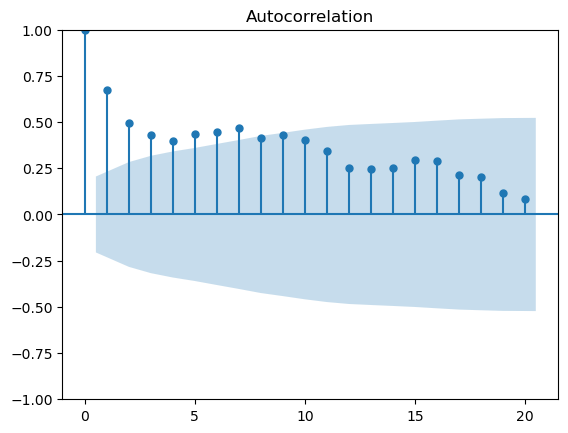

In [163]:
plot_acf(ipc['diff'].dropna())
plt.show()

#### $\nabla^2\text{IPC}$

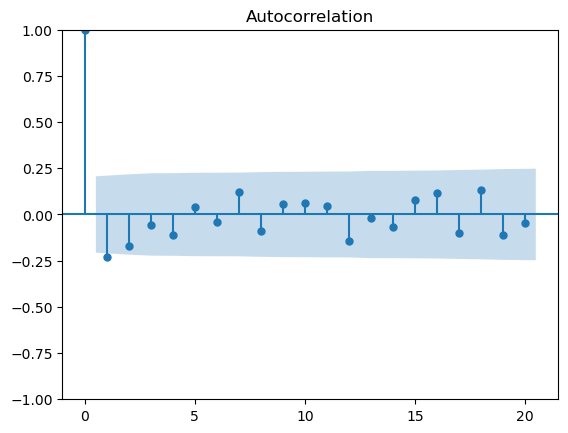

In [177]:
plot_acf(ipc['diff2'].dropna())
plt.show()

#### $\nabla\text{T(IPC)}$

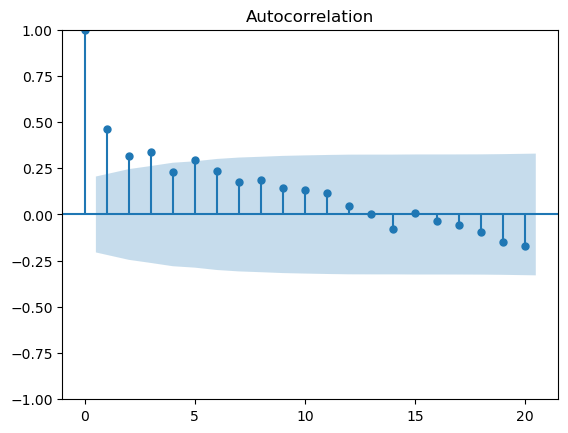

In [178]:
plot_acf(tipc['diff'].dropna())
plt.show()

#### $\nabla^2\text{T(IPC)}$

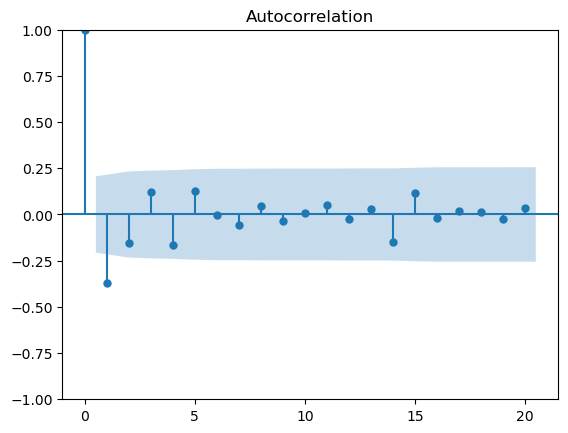

In [89]:
plot_acf(tipc['diff2'].dropna())
plt.show()

Se ve como un $\text{MA}(1)$, porque solo el primer lag es significativo y las demas autocorrelaciones dentro de las bandas azules no son significativamente distintas de cero.

###### **Explicaci√≥n**

Las autocorrelaciones en una gr√°fica de Funci√≥n de Autocorrelaci√≥n (ACF) se consideran significativas si est√°n fuera de las bandas azules, porque esto indica que la correlaci√≥n observada no es explicable solo por ruido aleatorio.  

Las bandas azules en una gr√°fica de ACF representan el intervalo de confianza para la hip√≥tesis nula:

$$
H_0: \rho(k) = 0
$$

donde $\rho(k)$ es la autocorrelaci√≥n en el lag $k$.  

- Si un punto cae dentro de las bandas, la autocorrelaci√≥n en ese lag no es significativamente diferente de 0 ‚Üí No hay suficiente evidencia para decir que hay una correlaci√≥n real en ese lag.  
- Si un punto cae fuera de las bandas, la autocorrelaci√≥n en ese lag es significativamente diferente de 0 ‚Üí Hay una correlaci√≥n real en ese lag que no es explicable solo por ruido aleatorio.  

**¬øC√≥mo se Calculan las Bandas Azules?**   

Para una serie de tiempo de $n$ observaciones, las bandas se aproximan con:  

$$
\pm \frac{1.96}{\sqrt{n}}
$$

Este intervalo proviene de la distribuci√≥n normal est√°ndar ($N(0,1)$), ya que bajo $H_0$, las autocorrelaciones deber√≠an distribuirse aproximadamente como:  

$$
\rho(k) \sim \mathcal{N}\left(0, \frac{1}{n}\right)
$$

Para $n$ grande, se usa $\pm 1.96/\sqrt{n}$ para construir un intervalo de confianza del 95%.  

###### 

## **Modelado**

#### **Librerias**

In [90]:
from statsmodels.tsa.arima.model import ARIMA

#### $\nabla^2\text{IPC}$

In [113]:
arima021 = ARIMA(ipc['IPC'], order=(0,2,1)).fit()

In [115]:
arma01 = ARIMA(ipc['diff2'], order=(0,0,1)).fit()

#### $\nabla^2\text{T(IPC)}$

In [117]:
tarima021 = ARIMA(tipc["IPC"], order=(0,2,1)).fit()

c:\Users\herie\.conda\envs\data-mining\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
tarma01 = ARIMA(tipc['diff2'], order=(0,0,1)).fit()

c:\Users\herie\.conda\envs\data-mining\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## **Principio de Parsimonia**

##### **Pruebas de Significancia para Par√°metros Estad√≠sticos**

El principio de parsimonia, tambi√©n conocido como la navaja de Occam, establece que entre varias explicaciones posibles para un fen√≥meno, la m√°s sencilla es generalmente la correcta, siempre y cuando todas las explicaciones sean igualmente capaces de explicar los datos.

Para determinar si un par√°metro estimado ($\beta$, $\lambda$, etc.) es significativo, se usa una prueba de hip√≥tesis basada en su distribuci√≥n muestral.  


**Plantear las hip√≥tesis:**  

$$
H_0: \beta = 0  
\quad
\text{vs}
\quad
H_1: \beta \neq 0
$$  

- $H_0$: El par√°metro no es significativo.
- $H_1$: El par√°metro es significativo.  



**Calcular el estad√≠stico de prueba, usualmente:**  
 - Prueba $t$:  
   $$
   t = \frac{\hat{\beta}}{\text{SE}(\hat{\beta})}
   $$  

 - Prueba $z$ en muestras grandes. $n>30$
   $$
   z = \frac{\hat{\beta} - \beta_0}{\text{SE}(\hat{\beta})}
   $$ 

donde $\hat{\beta}$ es el estimador del par√°metro y $\text{SE}(\hat{\beta})$ es su error est√°ndar.




**Obtener el p-valor:**  

   $$
   P(T > |t| \mid H_0) = p_{\text{valor}}
   $$   

Si $p$-valor < $\alpha$, rechazamos $H_0$ y concluimos que el par√°metro es significativo.  

In [121]:
arima024 = ARIMA(ipc['IPC'], order=(0,2,4)).fit()
arima024.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    IPC   No. Observations:                   92
Model:                 ARIMA(0, 2, 4)   Log Likelihood                  -3.747
Date:                Thu, 06 Mar 2025   AIC                             17.493
Time:                        12:50:16   BIC                             29.992
Sample:                             0   HQIC                            22.534
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4405      0.094     -4.675      0.000      -0.625      -0.256
ma.L2         -0.2678      0.113     -2.365      0.018      -0.490      -0.046
ma.L3         -0.0428      0.088     -0.487      0.626      -0.215       0.129
ma.L4         -0.0250      0.120     -0.209      0.835      -0.260       0.210
sigma2         0.0631      0.006     10.288      0.000       0.051       0.075
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                81.10
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.56   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*El coeficiente $\theta_3 = 0.626$ no es significativo porque su $p$-valor es mayor que 0.05.*  

$$
H_0: \theta_3 = 0 \quad \text{vs.} \quad H_1: \theta_3 \neq 0
$$
$$
p\text{-valor} = 0.626 > 0.05 \Rightarrow \text{No se rechaza } H_0.
$$

#### $\nabla^2\text{IPC}$

In [114]:
arima021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    IPC   No. Observations:                   92
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  -8.588
Date:                Thu, 06 Mar 2025   AIC                             21.177
Time:                        12:13:44   BIC                             26.176
Sample:                             0   HQIC                            23.193
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6761      0.058    -11.723      0.000      -0.789      -0.563
sigma2         0.0704      0.007     10.680      0.000       0.057       0.083
===================================================================================
Ljung-Box (L1) (Q):                   4.50   Jarque-Bera (JB):                43.52
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               8.95   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
arma01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  diff2   No. Observations:                   92
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  -8.415
Date:                Thu, 06 Mar 2025   AIC                             22.830
Time:                        12:13:58   BIC                             30.395
Sample:                             0   HQIC                            25.883
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.011      0.505      0.613      -0.015       0.026
ma.L1         -0.6956      0.064    -10.887      0.000      -0.821      -0.570
sigma2         0.0701      0.008      9.211      0.000       0.055       0.085
===================================================================================
Ljung-Box (L1) (Q):                   5.13   Jarque-Bera (JB):                48.54
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              10.27   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### $\nabla^2\text{T(IPC)}$

In [118]:
tarima021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    IPC   No. Observations:                   92
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 910.701
Date:                Thu, 06 Mar 2025   AIC                          -1817.401
Time:                        12:14:08   BIC                          -1812.401
Sample:                             0   HQIC                         -1815.385
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5275   8.36e-20  -6.31e+18      0.000      -0.528      -0.528
sigma2          1e-10   2.21e-10      0.452      0.651   -3.33e-10    5.33e-10
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                15.05
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.72
Prob(H) (two-sided):                  0.57   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.05e+25. Standard errors may be unstable.
"""

In [120]:
tarma01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  diff2   No. Observations:                   92
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 929.241
Date:                Thu, 06 Mar 2025   AIC                          -1852.481
Time:                        12:14:25   BIC                          -1844.916
Sample:                             0   HQIC                         -1849.428
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.539e-07    6.3e-07     -1.197      0.231   -1.99e-06     4.8e-07
ma.L1         -0.5274    9.9e-13  -5.33e+11      0.000      -0.527      -0.527
sigma2      9.295e-11   2.17e-10      0.428      0.668   -3.32e-10    5.18e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                16.81
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.55
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+25. Standard errors may be unstable.
"""

## **Analisis de Residuos**

#### **Obtener los residuos**

In [211]:
resarima021 = arima021.resid.dropna()
resarma01 = arma01.resid.dropna()
restarima021 = tarima021.resid.dropna()
restarma01 = tarma01.resid.dropna()

### **Media Cero**

##### mas info

$$
H_0: \beta = 0  
\quad
\text{vs}
\quad
H_1: \beta \neq 0
$$  

**Tabla comparativa** de las pruebas m√°s comunes para evaluar si una variable tiene **media cero** (\(\mathbb{E}[X] = 0\)).  


**üìå Comparaci√≥n de pruebas para media cero**  

| **Prueba**               | **Ventajas** | **Desventajas** | **Cu√°ndo usarla** |
|--------------------------|-------------|----------------|------------------|
| **Prueba t de una muestra** | ‚úî F√°cil de interpretar. <br> ‚úî Funciona bien si los datos son normales. <br> ‚úî Muy utilizada en estad√≠stica. | ‚ùå Supone que los datos siguen una normal. <br> ‚ùå Puede perder precisi√≥n si la muestra es peque√±a y la distribuci√≥n no es normal. | Si los datos son **normales** o la muestra es grande (\(n > 30\)). |
| **Prueba de signo**      | ‚úî No asume normalidad. <br> ‚úî Robusta ante valores at√≠picos. | ‚ùå Menos potente que la prueba t si los datos son normales. | Si los datos pueden no ser normales o tienen **outliers**. |
| **Prueba de Wilcoxon (signed-rank)** | ‚úî No asume normalidad. <br> ‚úî M√°s potente que la prueba de signo. | ‚ùå Menos potente que la prueba t si los datos son normales. | Si los datos no son normales pero tienes suficientes observaciones (\(n > 10\)). |
| **Prueba Z de una muestra** | ‚úî Funciona bien en muestras grandes. <br> ‚úî Similar a la prueba t pero para \(n > 30\). | ‚ùå Supone que se conoce la varianza poblacional. | Si la muestra es **grande (\(n > 30\))** y conoces la varianza poblacional. |


**üìå ¬øQu√© prueba elegir?**
- üìå **Si los datos son normales** ‚Üí **Prueba t de una muestra**.  
- üìå **Si la muestra es grande (\(n > 30\)) y conoces la varianza** ‚Üí **Prueba Z**.  
- üìå **Si los datos no son normales y pueden tener outliers** ‚Üí **Prueba de signo**.  
- üìå **Si los datos no son normales pero hay suficientes observaciones (\(n > 10\))** ‚Üí **Prueba de Wilcoxon**.  
  

In [ ]:
from scipy.stats import t as t_dist

In [183]:
xres = resarima021.mean()
sres = resarima021.std()
n = len(resarima021)

In [184]:
t = xres/sres * n**0.5

In [190]:
p = 2 * t_dist.cdf(-abs(t), n-1)
p

0.6265782181358964

##### Implementaci√≥n

In [234]:
from scipy.stats import ttest_1samp

ttest_1samp(resarima021, 0)

TtestResult(statistic=0.4882060649612207, pvalue=0.6265782181358963, df=91)

In [235]:
from scipy.stats import wilcoxon

wilcoxon(resarima021)

WilcoxonResult(statistic=2041.0, pvalue=0.7027567294577559)

In [236]:
from statsmodels.stats.descriptivestats import sign_test

sign_test(resarima021)

(-2.0, 0.7546517496104984)

### **Distribucion Normal**

##### **m√°s info**

$$
H_0: \text{Distribuci√≥n normal}
\quad
\text{vs}
\quad
H_1: \text{Distribuci√≥n NO normal} 
$$  

| Prueba             | ¬øQu√© eval√∫a? | Ventajas | Desventajas |
|------------------------|-----------------|--------------|-----------------|
| Kolmogorov-Smirnov | Distribuci√≥n emp√≠rica vs. normal est√°ndar | Funciona en muestras grandes | No permite estimar media y varianza |
| Shapiro-Wilk | Normalidad en muestras peque√±as | M√°s potente en n < 50 | Menos confiable en n grandes |
| Jarque-Bera | Skewness y curtosis | R√°pida, √∫til en modelos econom√©tricos | No detecta diferencias en colas |
| D‚ÄôAgostino-Pearson | Skewness y curtosis con correcci√≥n | M√°s precisa que Jarque-Bera en n grandes | No ideal para n peque√±as |
| Anderson-Darling | Diferencias en toda la distribuci√≥n | Sensible a colas de la distribuci√≥n | M√°s conservadora |
| Lilliefors | Kolmogorov-Smirnov ajustado | Permite estimar media y varianza | Menos potente en muestras peque√±as |

**üìå Comparaci√≥n de pruebas de normalidad**  

| **Prueba**                | **Ventajas** | **Desventajas** | **Cu√°ndo usarla** |
|---------------------------|-------------|----------------|------------------|
| **Shapiro-Wilk**          | ‚úî Alta potencia en muestras peque√±as (< 50). <br> ‚úî Sensible a desviaciones de normalidad. | ‚ùå No funciona bien en muestras grandes (> 5000). <br> ‚ùå Sensible a outliers. | Si la muestra es **peque√±a** (n < 50). |
| **Kolmogorov-Smirnov (KS)** | ‚úî Se puede usar con cualquier distribuci√≥n te√≥rica. <br> ‚úî Funciona para grandes muestras. | ‚ùå Poco potente para detectar desviaciones sutiles de normalidad. <br> ‚ùå Depende de la distribuci√≥n te√≥rica elegida. | Si quieres comparar los datos con una **distribuci√≥n espec√≠fica**. |
| **Anderson-Darling (AD)** | ‚úî M√°s potente que KS. <br> ‚úî Detecta mejor problemas en las colas de la distribuci√≥n. | ‚ùå Menos conocido que otras pruebas. <br> ‚ùå Necesita valores cr√≠ticos espec√≠ficos. | Si quieres evaluar **problemas en las colas** de la distribuci√≥n. |
| **D‚ÄôAgostino-Pearson (K¬≤)** | ‚úî Funciona bien con muestras grandes (> 50). <br> ‚úî Eval√∫a sesgo y curtosis. | ‚ùå No es recomendable para muestras peque√±as. | Si la muestra es **grande** y quieres evaluar **asimetr√≠a y curtosis**. |
| **Jarque-Bera (JB)**      | ‚úî Ampliamente usada en econometr√≠a y finanzas. <br> ‚úî Basada en asimetr√≠a y curtosis. | ‚ùå No detecta desviaciones en las colas. <br> ‚ùå Puede fallar si los datos no tienen varianza constante. | Si trabajas con **series de tiempo o datos financieros**. |
| **Lilliefors**            | ‚úî Versi√≥n mejorada de KS. <br> ‚úî Se puede usar cuando la media y varianza no son conocidas. | ‚ùå Menos potente que Shapiro-Wilk o AD. | Si quieres una prueba como KS pero sin conocer la media y varianza de antemano. |

**üìå ¬øQu√© prueba elegir?**
- üìå **Si la muestra es peque√±a ($n < 50$)** ‚Üí **Shapiro-Wilk**.  
- üìå **Si la muestra es grande ($n > 50$)** ‚Üí **D‚ÄôAgostino-Pearson** o **Jarque-Bera**.  
- üìå **Si te interesan las colas de la distribuci√≥n** ‚Üí **Anderson-Darling**.  
- üìå **Si los datos vienen de un modelo financiero o econom√©trico** ‚Üí **Jarque-Bera**.  
- üìå **Si quieres una prueba flexible sin asumir media y varianza** ‚Üí **Lilliefors**.  


#### Implementaci√≥n

In [231]:
from scipy.stats import kstest
# Estadistico, p-valor
kstest(resarima021, 'norm')

KstestResult(statistic=0.32107767359058836, pvalue=6.14297768131239e-09, statistic_location=-0.2606930057314685, statistic_sign=-1)

In [230]:
from statsmodels.stats.diagnostic import lilliefors
# Estadistico, p-valor
lilliefors(resarima021)

(0.41876842740385, 0.0009999999999998899)

In [ ]:
from scipy.stats import jarque_bera

jarque_bera(resarima021)

SignificanceResult(statistic=13528.424136386064, pvalue=0.0)

In [ ]:
from scipy.stats import normaltest

normaltest(resarima021)

NormaltestResult(statistic=154.298723113036, pvalue=3.1221804043197816e-34)

In [233]:
from scipy.stats import anderson

anderson(resarima021)

AndersonResult(statistic=28.35396278149082, critical_values=array([0.554, 0.63 , 0.756, 0.882, 1.049]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.1802170379697535, scale=3.540679290012678)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### **Varianza Constante**

#### mas info

$$
H_0: \text{Varianza constante (homocedasticidad)}
\quad
\text{vs}
\quad
H_1: \text{Varianza NO constante (heterocedasticidad)} 
$$  

Aqu√≠ tienes una tabla con las **ventajas y desventajas** de las pruebas m√°s comunes para verificar **homocedasticidad** (varianza constante).  


**üìå Comparaci√≥n de pruebas de homocedasticidad**  

| **Prueba**              | **Ventajas** | **Desventajas** | **Cu√°ndo usarla** |
|-------------------------|-------------|----------------|------------------|
| **Breusch-Pagan**       | ‚úî F√°cil de interpretar. <br> ‚úî Ampliamente usada en econometr√≠a. <br> ‚úî Buena para heterocedasticidad lineal. | ‚ùå No detecta formas no lineales de heterocedasticidad. <br> ‚ùå Sensible a errores no normales. | Si sospechas que la varianza de los residuales depende de las variables explicativas. |
| **White**               | ‚úî Detecta heterocedasticidad de cualquier tipo. <br> ‚úî No necesita especificar la forma de la heterocedasticidad. | ‚ùå Puede perder potencia en muestras peque√±as. <br> ‚ùå Sensible a valores at√≠picos. | Si quieres detectar **cualquier** tipo de heterocedasticidad, no solo la lineal. |
| **Goldfeld-Quandt**     | ‚úî √ötil si la heterocedasticidad est√° en dos grupos de datos. <br> ‚úî F√°cil de implementar. | ‚ùå Menos potente si la heterocedasticidad es gradual en lugar de abrupta. | Si sospechas que la heterocedasticidad ocurre entre dos subconjuntos de datos. |
| **Levene**              | ‚úî No asume normalidad en los datos. <br> ‚úî M√°s robusto que Bartlett ante outliers. | ‚ùå Menos potente que Bartlett si los datos son normales. | Si los datos pueden **no ser normales**. |
| **Bartlett**            | ‚úî M√°s potente que Levene si los datos son normales. | ‚ùå Muy sensible a valores at√≠picos. <br> ‚ùå No funciona bien si los datos no son normales. | Si los datos son **normales** y quieres m√°xima precisi√≥n. |
| **Brown-Forsythe**      | ‚úî Versi√≥n mejorada de Levene, menos sensible a outliers. <br> ‚úî Funciona bien en datos no normales. | ‚ùå Menos potente que Bartlett en datos perfectamente normales. | Si los datos pueden no ser normales, pero quieres evitar la sensibilidad extrema a outliers de Bartlett. |


**üìå ¬øQu√© prueba elegir?**
- üìå **Si tienes datos de regresi√≥n:**  
  - **Breusch-Pagan** (heterocedasticidad lineal).  
  - **White** (heterocedasticidad en cualquier forma).  
- üìå **Si divides los datos en dos grupos:**  
  - **Goldfeld-Quandt**.  
- üìå **Si los datos pueden no ser normales:**  
  - **Levene** o **Brown-Forsythe** (menos sensibles a outliers).  
- üìå **Si los datos son normales:**  
  - **Bartlett** (m√°xima potencia).  

#### implementacion

In [ ]:
from statsmodels.tools.tools import add_constant
add_constant(ipc[['IPC']])

const     IPC
0     1.0  30.210
1     1.0  30.321
2     1.0  30.349
3     1.0  30.430
4     1.0  30.433
..    ...     ...
87    1.0  62.939
88    1.0  63.380
89    1.0  63.633
90    1.0  64.170
91    1.0  64.787

[92 rows x 2 columns]

In [107]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan


# Add a constant to the exogenous variables
exog = add_constant(ipc[['IPC']])

# Perform the test
stat, p_value, _, _ = het_breuschpagan(residuals, exog)
print(f'Statistic: {stat}, p-value: {p_value}') # p-value > 0.05, homocedasticidad

Statistic: 1.6816738803827493, p-value: 0.19470218160211475


### **Independencia**

#### mas info

Aqu√≠ tienes una **comparaci√≥n de las pruebas m√°s comunes para evaluar independencia** entre variables.  




**üìå Comparaci√≥n de pruebas de independencia**  

| **Prueba**               | **Ventajas** | **Desventajas** | **Cu√°ndo usarla** |
|--------------------------|-------------|----------------|------------------|
| **Chi-cuadrado de independencia** | ‚úî F√°cil de interpretar. <br> ‚úî Funciona bien con datos categ√≥ricos. | ‚ùå No funciona con datos num√©ricos continuos. <br> ‚ùå Puede ser poco precisa si hay celdas con frecuencias bajas. | Si ambas variables son **categ√≥ricas**. |
| **Coeficiente de correlaci√≥n de Pearson** | ‚úî Mide relaci√≥n lineal entre dos variables num√©ricas. <br> ‚úî F√°cil de interpretar. | ‚ùå Solo detecta relaciones **lineales**. <br> ‚ùå Sensible a outliers. | Si ambas variables son **num√©ricas** y quieres ver si hay relaci√≥n **lineal**. |
| **Coeficiente de correlaci√≥n de Spearman** | ‚úî Mide relaci√≥n **mon√≥tona** (no solo lineal). <br> ‚úî M√°s robusto ante valores at√≠picos. | ‚ùå Menos potente que Pearson si la relaci√≥n es realmente lineal. | Si ambas variables son **num√©ricas**, pero la relaci√≥n puede no ser lineal. |
| **Coeficiente de correlaci√≥n de Kendall ($\tau$)** | ‚úî M√°s robusto ante empates en los datos. <br> ‚úî M√°s preciso en muestras peque√±as. | ‚ùå Computacionalmente m√°s costoso que Spearman. | Si los datos tienen **muchos valores repetidos** o la muestra es peque√±a. |
| **Prueba de Ljung-Box** | ‚úî Espec√≠fica para detectar correlaci√≥n en series de tiempo. | ‚ùå Solo analiza autocorrelaci√≥n, no correlaci√≥n entre dos variables distintas. | Si trabajas con **series de tiempo** y quieres ver si hay autocorrelaci√≥n. |
| **Mutual Information (Informaci√≥n Mutua)** | ‚úî Detecta **cualquier** tipo de relaci√≥n entre variables. <br> ‚úî No supone ninguna forma espec√≠fica de relaci√≥n. | ‚ùå No tiene una interpretaci√≥n f√°cil como Pearson o Spearman. | Si buscas relaciones **no lineales** entre dos variables. |




**üìå ¬øQu√© prueba elegir?**
- üìå **Si ambas variables son categ√≥ricas** ‚Üí **Chi-cuadrado de independencia**.  
- üìå **Si ambas variables son num√©ricas y crees que la relaci√≥n es lineal** ‚Üí **Pearson**.  
- üìå **Si ambas variables son num√©ricas pero la relaci√≥n puede no ser lineal** ‚Üí **Spearman** o **Kendall**.  
- üìå **Si est√°s trabajando con series de tiempo** ‚Üí **Ljung-Box**.  
- üìå **Si quieres detectar cualquier tipo de relaci√≥n sin supuestos** ‚Üí **Mutual Information**.  




**üìå Ejemplo en Python: Prueba Chi-cuadrado**
```python
import scipy.stats as stats
import pandas as pd

# Crear tabla de contingencia
tabla = pd.crosstab(df['Variable1'], df['Variable2'])

# Prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla)
print(f"Estad√≠stico Chi-cuadrado: {chi2_stat}, p-valor: {p_value}")

if p_value > 0.05:
    print("No se rechaza la independencia entre las variables")
else:
    print("Se rechaza la independencia, hay relaci√≥n entre las variables")
```

‚úÖ **Si $p > 0.05$** ‚Üí No se rechaza $H_0$ (las variables son independientes).  
‚ùå **Si $p < 0.05$** ‚Üí Se rechaza $H_0$ (las variables **no** son independientes).  




üîπ **¬øQuieres probar alguna de estas pruebas con tus datos?** üöÄ

#### Implementacion

### **Modelo admisible**

es Estacionario e einvertible